<a href="https://colab.research.google.com/github/Muhamadsulton/kaggle/blob/main/wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#загрузка библиотек 
import pandas as pd #библиотека для работы с таблицами
import numpy as np #библиотека для работы с матрицами итд
import matplotlib.pyplot as plt #библиотека для визуализации графиков

In [ ]:
#загрузить файл
data = pd.read_csv('winemag-data_first150k.csv', header = 0, index_col = False)

In [ ]:
#показать 5 первых строчек
data.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [ ]:
#показать колонки датафрейма
data.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [ ]:
#информация о колонках фрейма
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 8.1+ MB
None


In [ ]:
# описательная статистика числовых типов по умолчанию
data.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [ ]:
#описательная статистика объектов
data.describe(include = 'object')

,country,description,designation,province,region_1,region_2,variety,winery
count,150925,150930,105195,150925,125870,60953,150930,150930
unique,48,97821,30621,455,1236,18,632,14810
top,US,"92-94 Barrel sample. A rounded wine, its tanni...",Reserve,California,Napa Valley,Central Coast,Chardonnay,Williams Selyem
freq,62397,6,2752,44508,6209,13057,14482,374


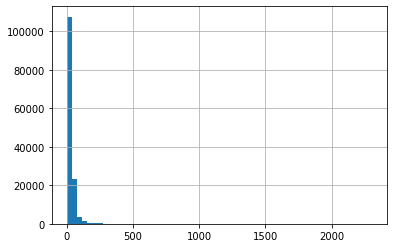

In [ ]:
#гистограмма цен
data['price'].hist(bins = 60)

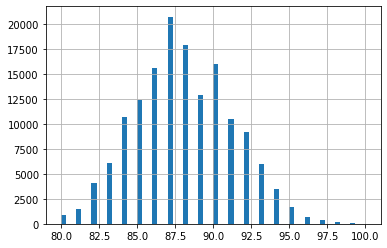

In [ ]:
# гистограмма рейтинга вин
data['points'].hist(bins = 60)

In [ ]:
# посмотреть на размерность
np.shape(data)

(150930, 11)

In [ ]:
#подсчет нулевых строк в колонке
data['region_2'].isna().value_counts()

True     89977
False    60953
Name: region_2, dtype: int64

In [ ]:
# удаляем колонку из-за большого содержания нулевых значений
data = data.drop(['region_2'],axis = 1)

In [ ]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude


In [ ]:
#удаление дубликатов
data = data[data.duplicated('description', keep=False)]

In [ ]:
#удаление пустых значений из подмножества объектов описания и рейтинг
data.dropna(subset=['description', 'points'])

,Unnamed: 0,country,description,designation,points,price,province,region_1,variety,winery
25,25,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94,57.0,Kumeu,NaN,Chardonnay,Kumeu River
29,29,US,This standout Rocks District wine brings earth...,The Funk Estate,94,60.0,Washington,Walla Walla Valley (WA),Syrah,Saviah
60,60,Argentina,"Concentrated, ripe blackberry and cassis aroma...",The Apple Doesn't Fall Far From The Tree,91,30.0,Mendoza Province,Mendoza,Malbec,Matias Riccitelli
61,61,Australia,Moorooduc's estate Pinot Noir is a solid value...,NaN,91,36.0,Victoria,Mornington Peninsula,Pinot Noir,Moorooduc
62,62,Argentina,Smoky aromas of fresh-cut wood blend with berr...,Alegoría Gran Reserva,91,25.0,Mendoza Province,Mendoza,Malbec,Navarro Correas
...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,Champagne Blend,Gosset


In [ ]:
#просмотр размерности
np.shape(data)

(92393, 10)

In [ ]:
# создание нового фрейма данных с колонками описания и рейтинг
df = data[['description','points']]

In [ ]:
# добавления новой колонки к новому фрейму данных , функция apply передает значения всем объектам 
df = df.assign(description_length = df['description'].apply(len))

In [ ]:
df.head()

,description,points,description_length
25,"Yields were down in 2015, but intensity is up,...",94,215
29,This standout Rocks District wine brings earth...,94,333
60,"Concentrated, ripe blackberry and cassis aroma...",91,242
61,Moorooduc's estate Pinot Noir is a solid value...,91,315
62,Smoky aromas of fresh-cut wood blend with berr...,91,229


In [ ]:
# загружаем библиотеку для визуализации данных
import seaborn as sns

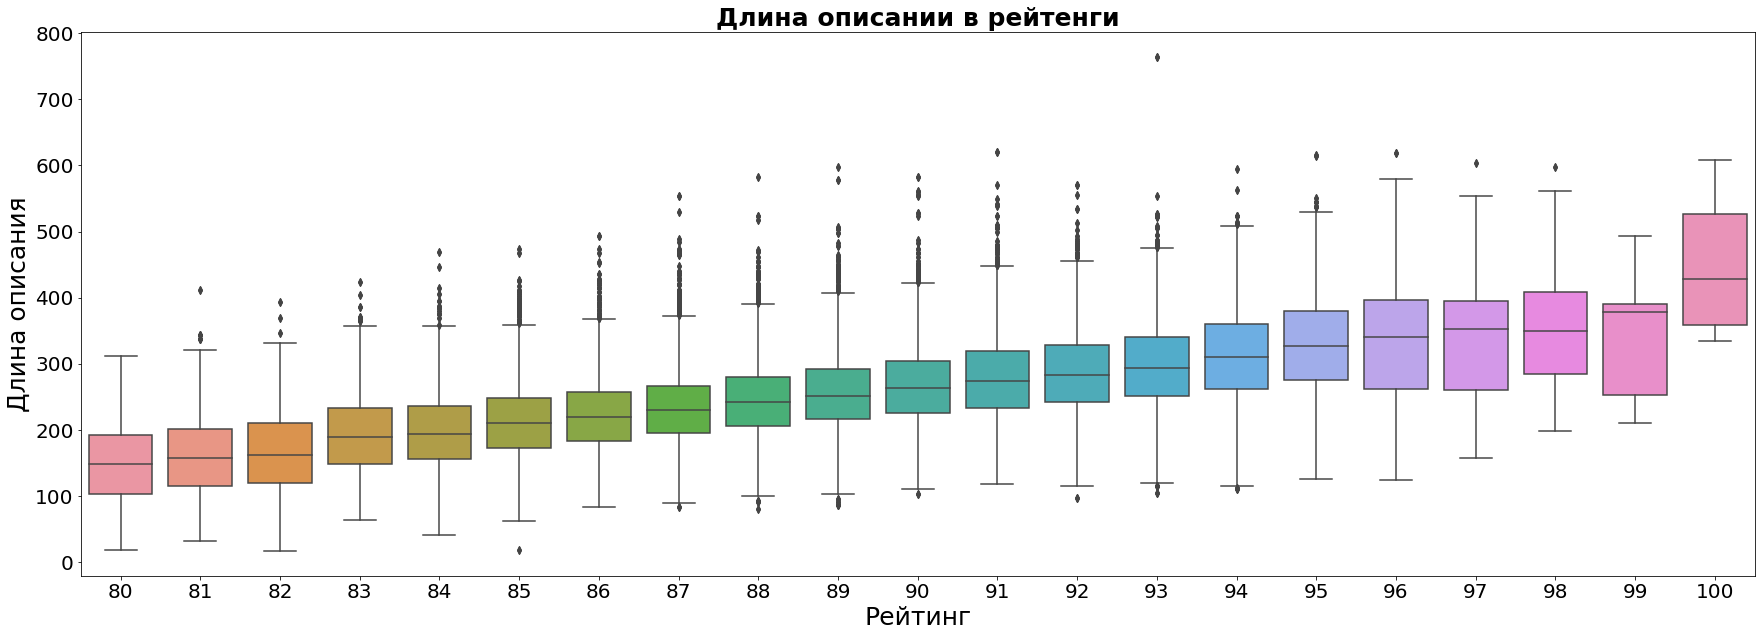

In [ ]:
# строим ящик с усиками(боксплот)
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x = 'points', y='description_length', data = df)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Длина описании в рейтенги', fontweight = "bold", size = 25) # Title
ax.set_ylabel('Длина описания', fontsize = 25) # Y label
ax.set_xlabel('Рейтинг', fontsize = 25) # X label
plt.show()

In [ ]:
#Вино из 90 пунктов ничем не отличается от вина из 91 пункта, так что описание, вероятно, также не отличается.
#упрощяем модель
def transform_points_simplified(points):
    if points < 84: # качество ниже среднего
        return 1
    elif points >= 84 and points < 88: #среднее
        return 2 
    elif points >= 88 and points < 92:#хорошие
        return 3 
    elif points >= 92 and points < 96:#очень хорошие
        return 4
    else:
        return 5 #отличные

In [ ]:
# добавление новой колонки(points_simplified - упрощенный рейтинг) к датафрейму df 
df = df.assign(points_simplified = df['points'].apply(transform_points_simplified))
df.head()

,description,points,description_length,points_simplified
25,"Yields were down in 2015, but intensity is up,...",94,215,4
29,This standout Rocks District wine brings earth...,94,333,4
60,"Concentrated, ripe blackberry and cassis aroma...",91,242,3
61,Moorooduc's estate Pinot Noir is a solid value...,91,315,3
62,Smoky aromas of fresh-cut wood blend with berr...,91,229,3


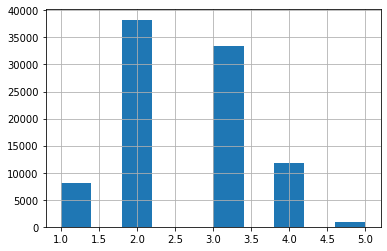

In [ ]:
# строим гистограмму и смотрим распределения рейтинга
df['points_simplified'].hist()

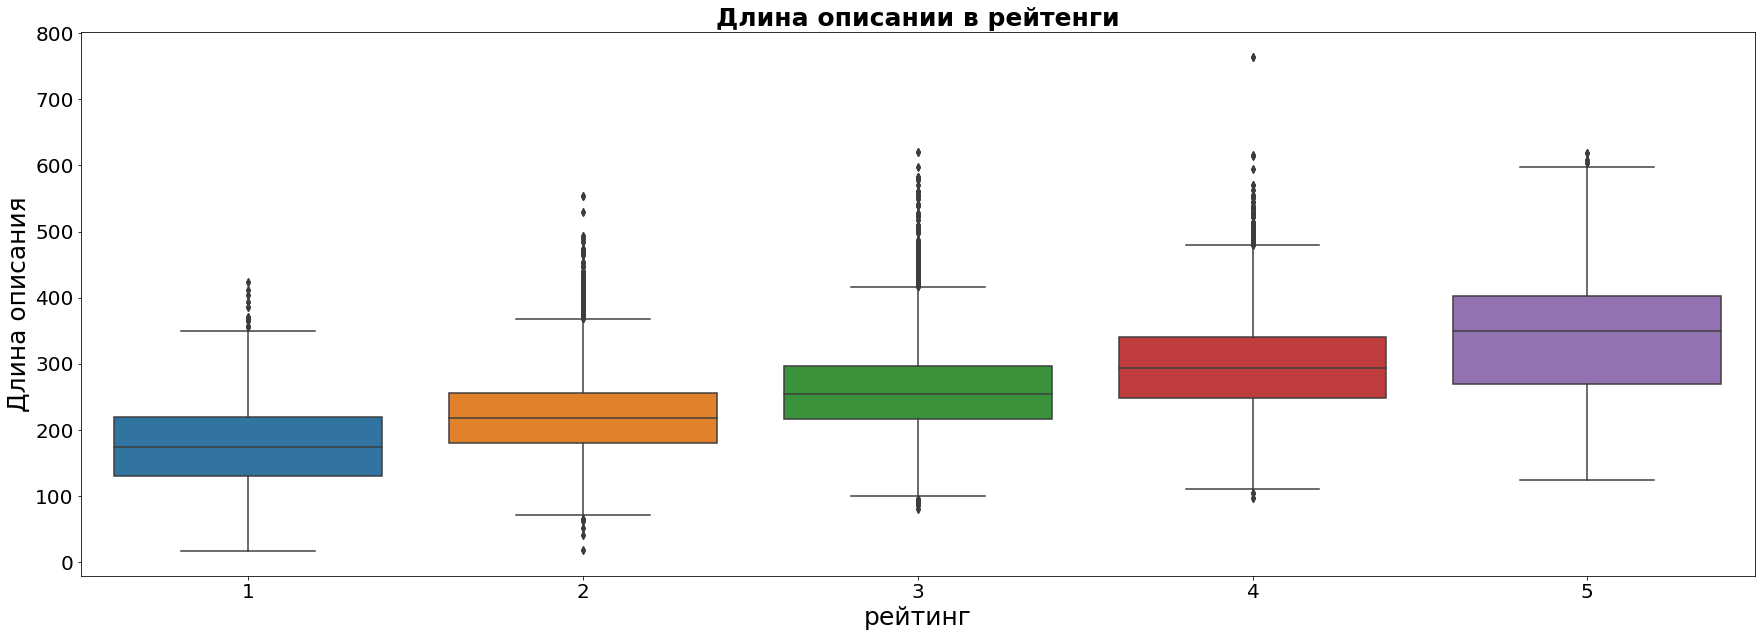

In [ ]:
# строим ящик с усиками (боксплот)
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='points_simplified', y='description_length', data=df)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Длина описании в рейтенги', fontweight="bold", size=25) # Title
ax.set_ylabel('Длина описания', fontsize = 25) # Y label
ax.set_xlabel('рейтинг', fontsize = 25) # X label
plt.show()
# как видно чем лучше вино тем длинее его описание

In [ ]:
# импортируем библиотеки для векторизации наших предложений из колонки description
# векторизация придает веса - значений каждому слову
#векторизация выводит разряженную матрицу со значениями отличными от нуля
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
# выбор колонки которые надо векторизовать
X = df['description']
y = df['points_simplified']
# создаем модель для векторизации
vectorizer = CountVectorizer()
# подгоняем модель под векторизацию
vectorizer.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
# преобразуем нашу разряженную матрицу 
X = vectorizer.transform(X)
print('размер разряженной матрицы: ', X.shape)
print('количество ненулевых вхождений: ', X.nnz)

размер разряженной матрицы:  (92393, 21400)
количество ненулевых вхождений:  3172240


In [ ]:
# загрузка библиотек для построения моделей машинного обучения
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# разбиение наших данных на тренировачные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
# создание модели случайного леса
rfc = RandomForestClassifier()
# начинаем подгонку модели на тренировачных данных
rfc.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# предсказать значения тестовой выборки
predictions = rfc.predict(X_test)
# посмотреть на точность предсказания 
print(classification_report(y_test, predictions))
# точность предсказания у нас является 0.97

              precision    recall  f1-score   support

           1       0.98      0.94      0.96       763
           2       0.95      0.98      0.97      3830
           3       0.97      0.96      0.97      3418
           4       0.99      0.94      0.97      1135
           5       1.00      0.93      0.96        94

    accuracy                           0.97      9240
   macro avg       0.98      0.95      0.96      9240
weighted avg       0.97      0.97      0.97      9240



In [ ]:
# загружаем библиотеки для построения логистической регрессии
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [ ]:
# создание модели машинного обучения
classifier = LogisticRegression(solver='lbfgs',random_state=0)

In [ ]:
# подгонка модели на тренировачных данных
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# предсказать значения тестовой выборки
predicted_y = classifier.predict(X_test)

In [ ]:
# посмотреть на точность предсказывания
# как мы выдим 0.76 следовательно логистическая регрессия является плохим методом для предсказывания для этого набора данных
print('Accuracy: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy: 0.76
